# Tutorial 1: CommonRoad_IO - Reading, Modifying, and Writing of Scenarios

This tutorial shows how CommonRoad XML-files can be read, modified, visualized, and stored. CommonRoad XML-files consist of a Scenario and a PlanningProblemSet. A Scenario represents the environment including a LaneletNetwork and a set of DynamicObstacle and StaticObstacle. A LaneletNetwork is built from lane segments (Lanelet), that can be connected arbitrarily. A PlanningProblemSet contains one PlanningProblem for every ego vehicle in the Scenario, consisting of an initial position and a GoalRegion that has to be reached.

## Reading

The CommonRoadFileReader reads the Scenario and the PlanningProblemSet from a CommonRoad XML-file:

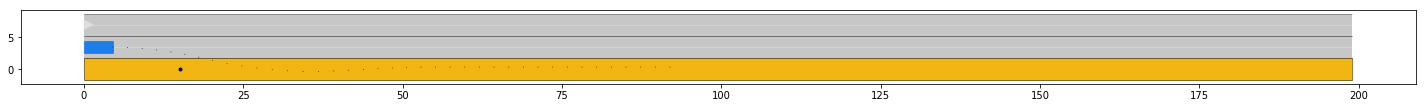

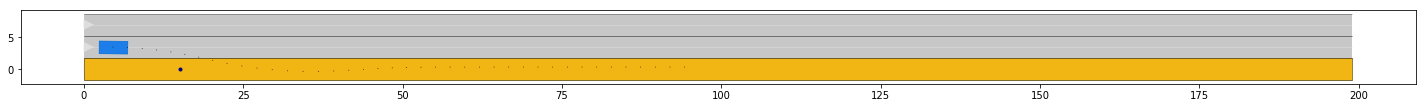

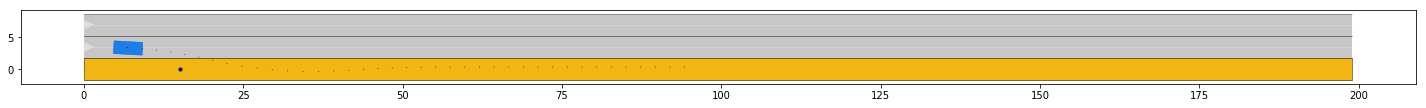

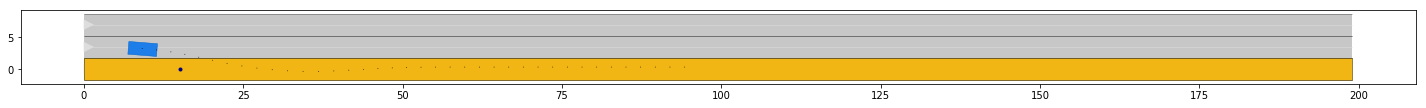

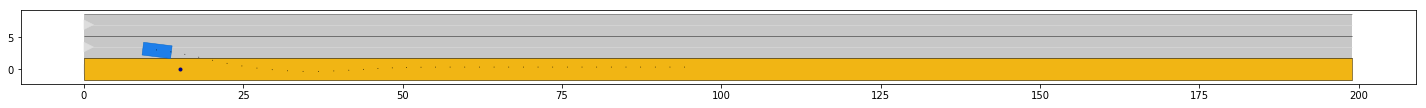

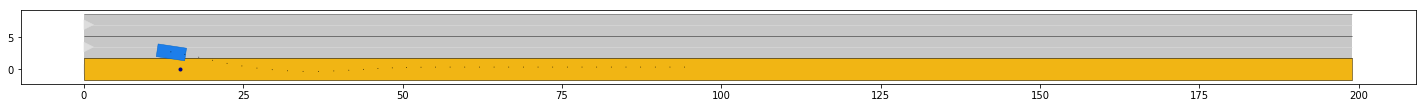

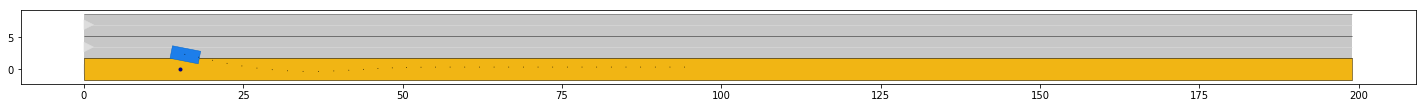

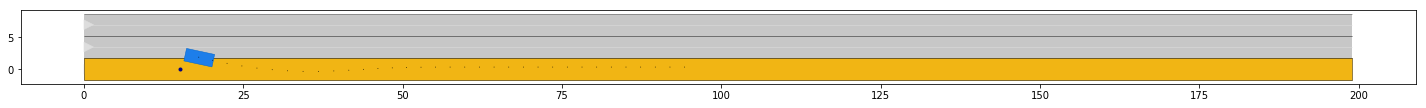

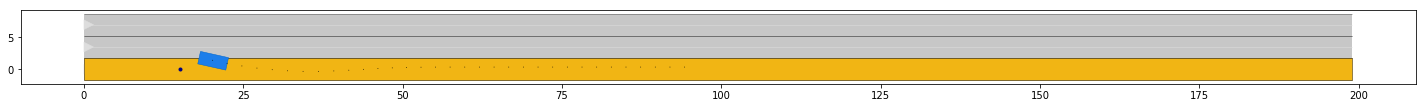

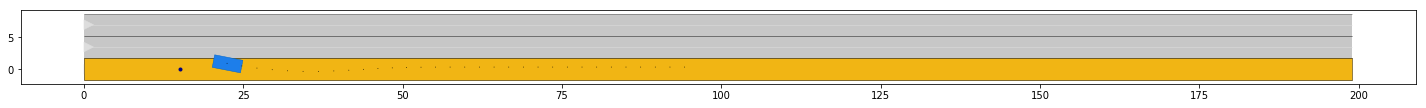

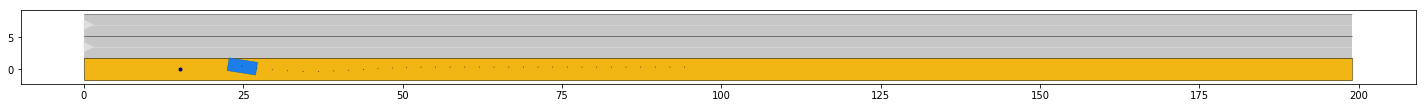

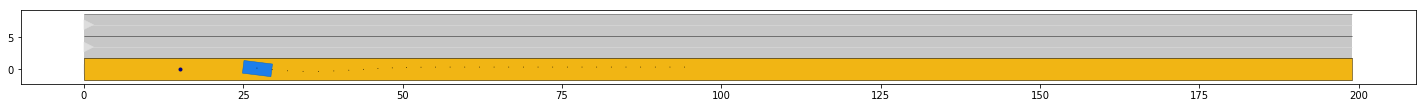

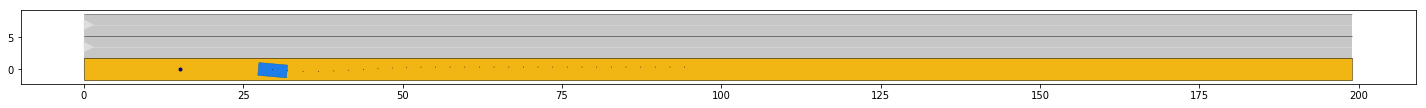

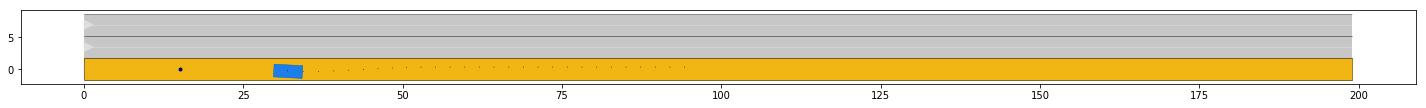

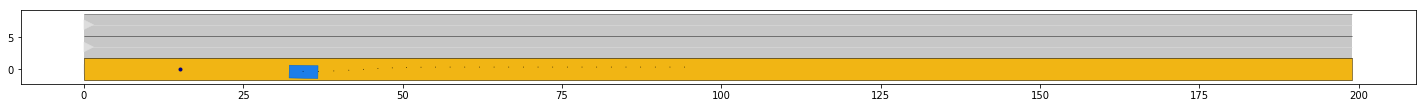

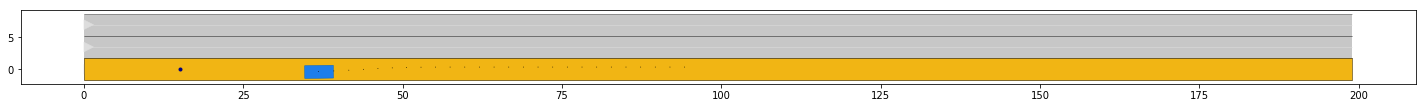

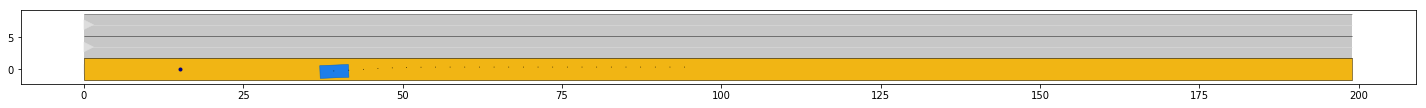

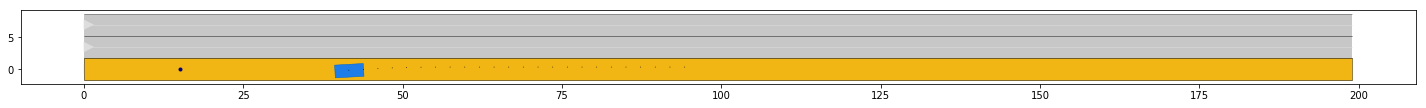

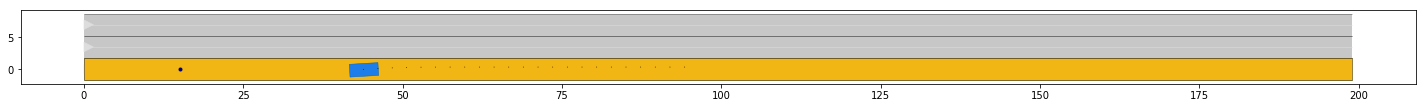

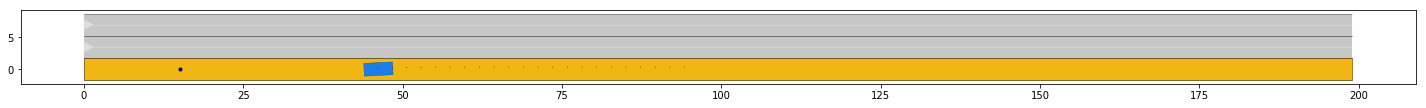

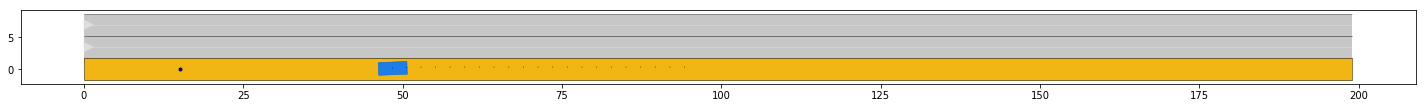

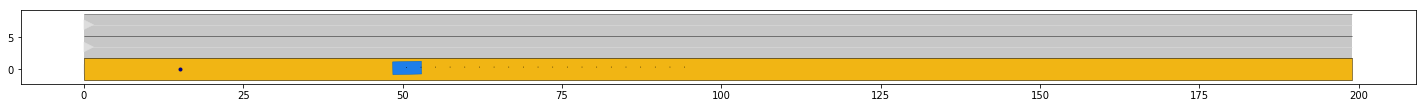

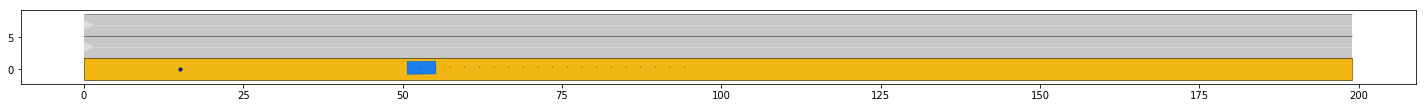

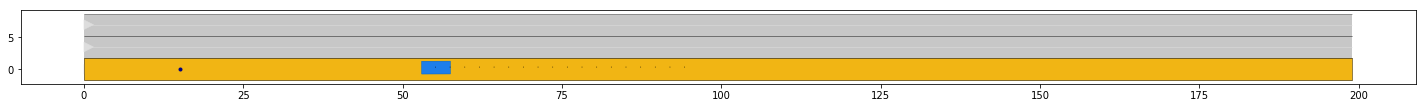

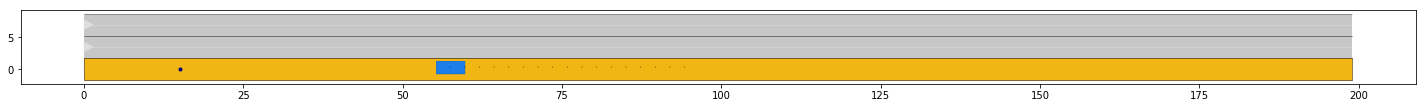

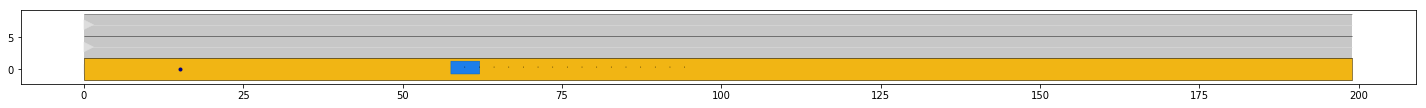

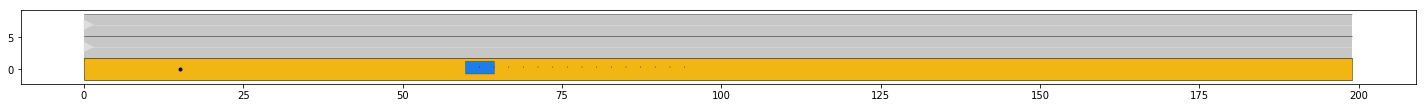

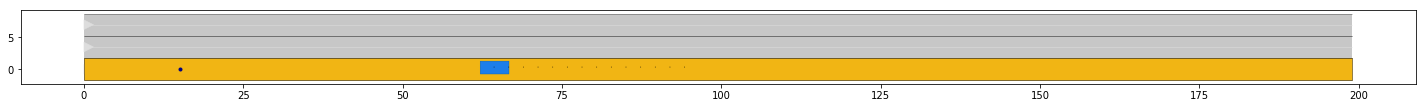

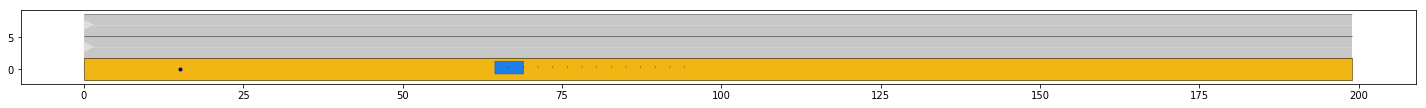

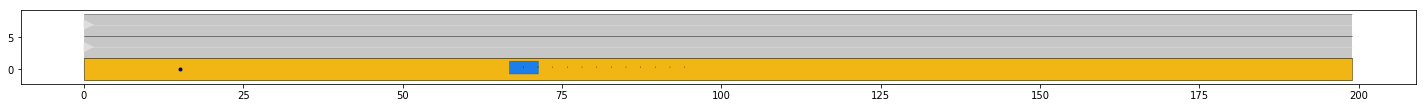

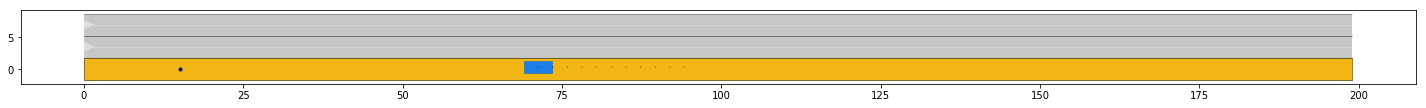

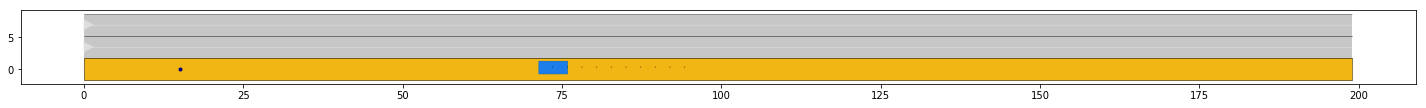

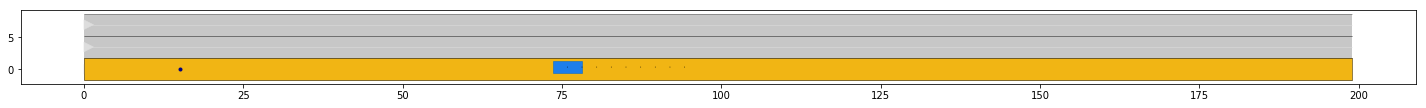

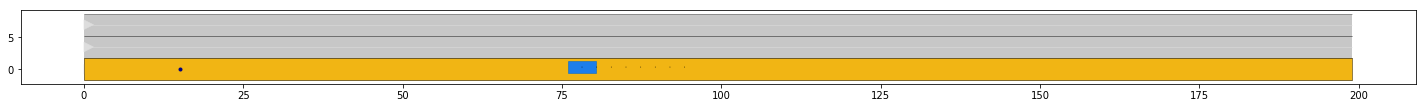

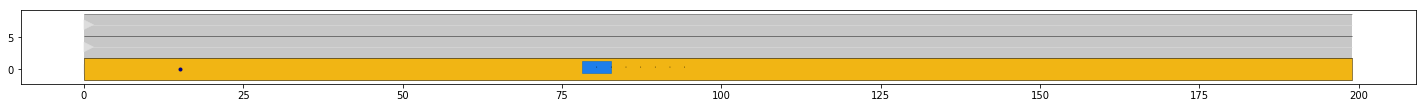

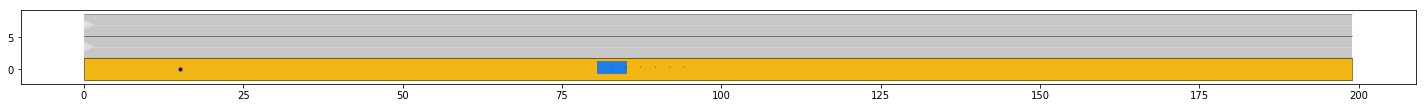

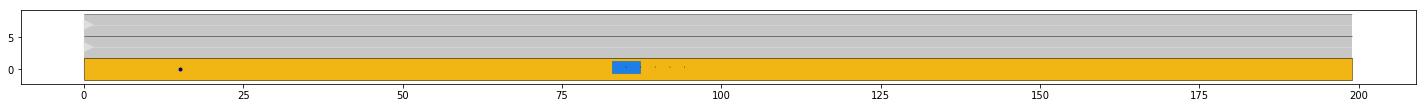

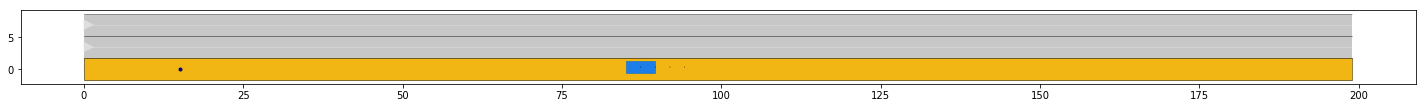

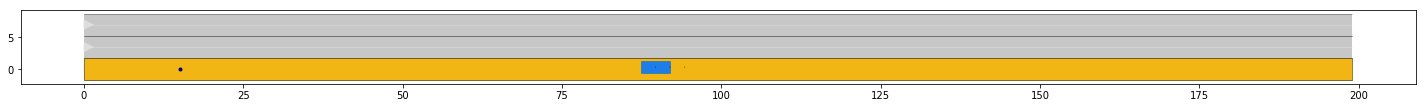

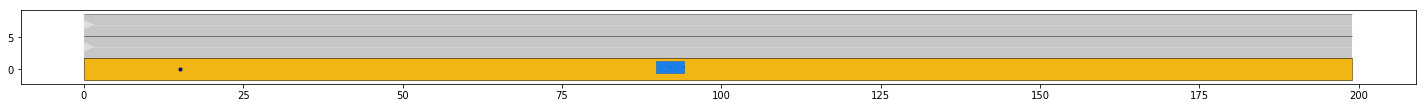

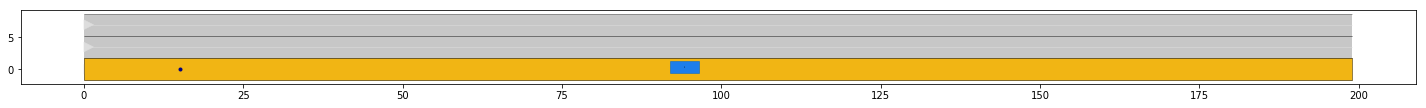

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

file_path = os.path.join(os.getcwd(), 'ZAM_Tutorial-1_1_T-1.xml')

# read the scenario
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

#plot the scenario for each time step
for i in range(0, 41):
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()

## Modifying

It is possible to modify existing CommonRoad scenarios to customize them to one's need. First, we add a static obstacle to the scenario with the following specification:

    - obstacle type: parked vehicle
    - obstacle shape: rectangle with a width of 2.0m and a length of 4.5m
    - initial state:
        - position: (30, 3.5) m
        - orientation: 0.02 rad

Since every object in the scenario must have a unique ID, we can use the member function 'generate_object_id' of Scenario to generate a unique ID.

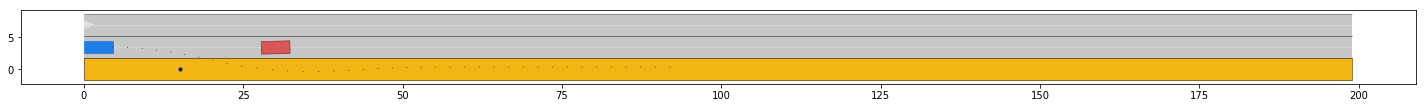

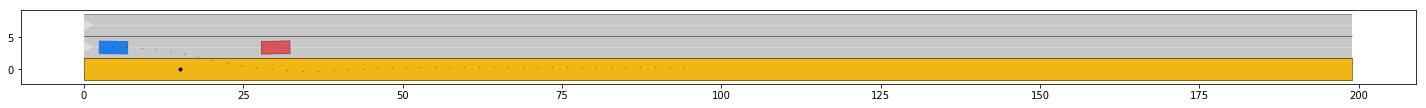

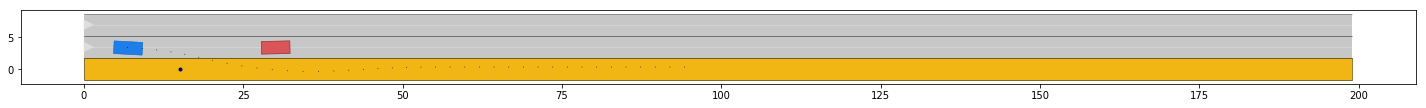

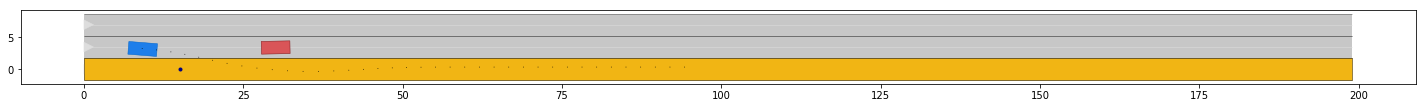

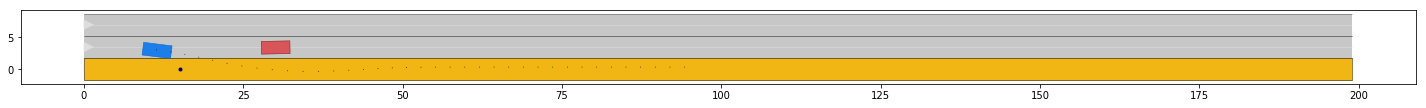

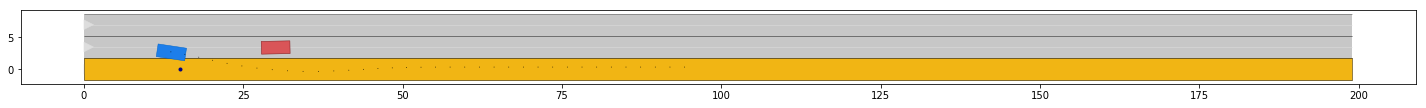

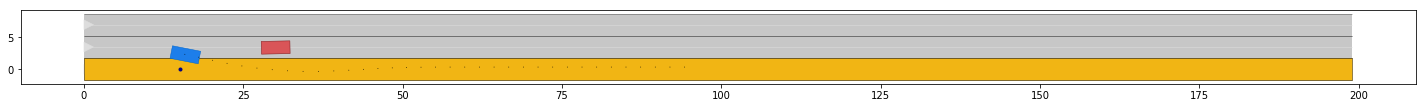

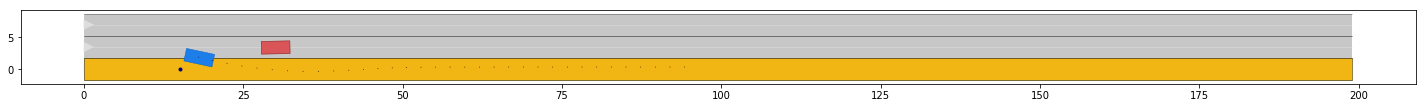

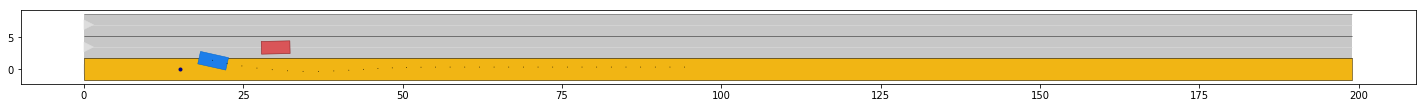

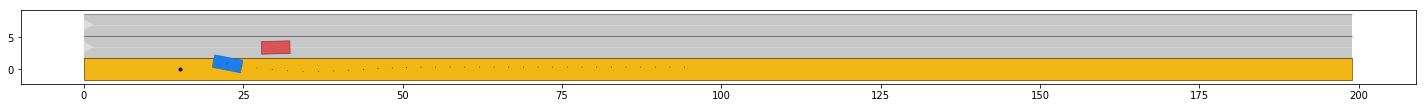

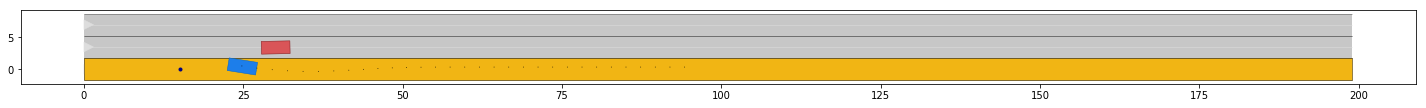

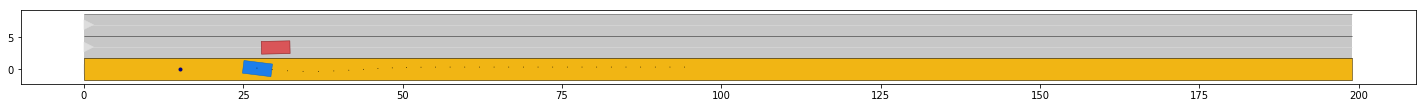

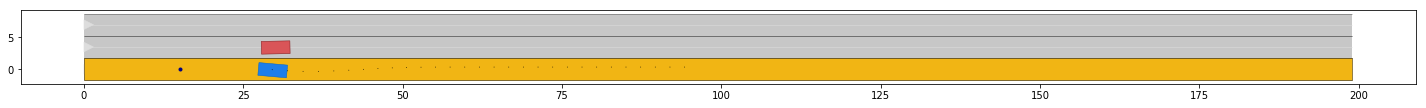

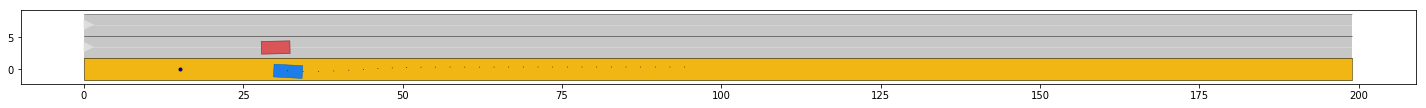

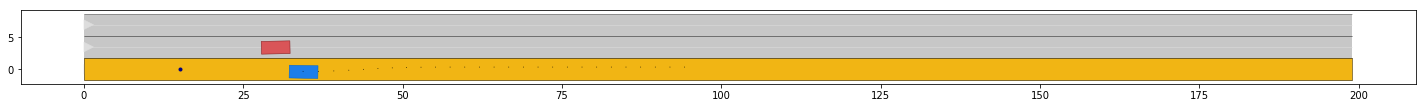

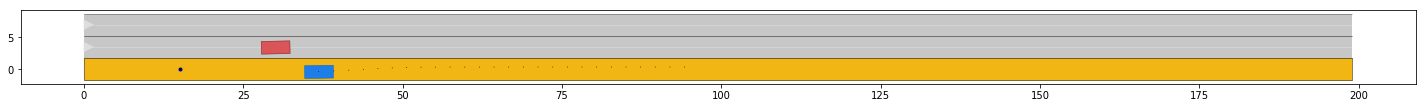

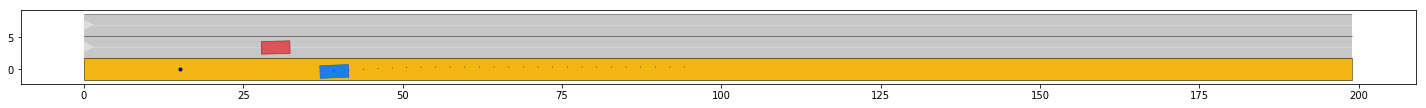

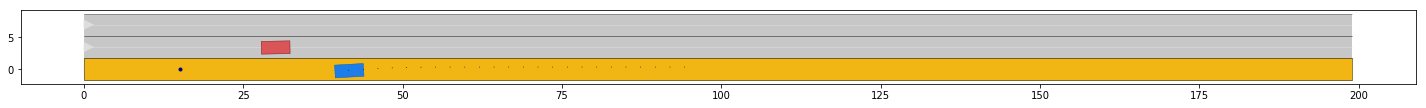

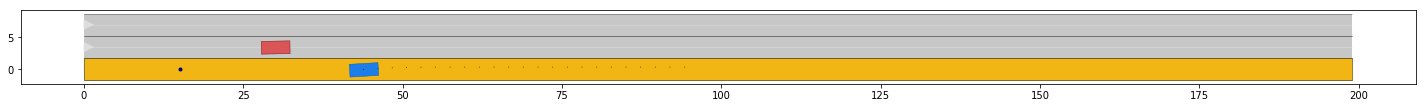

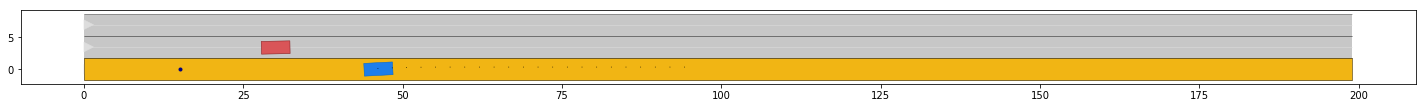

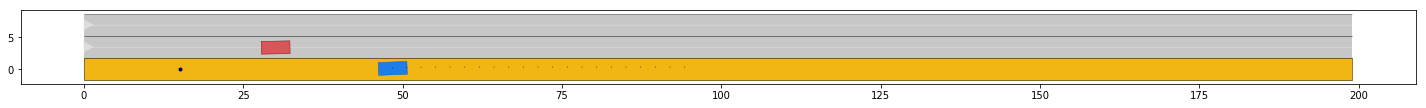

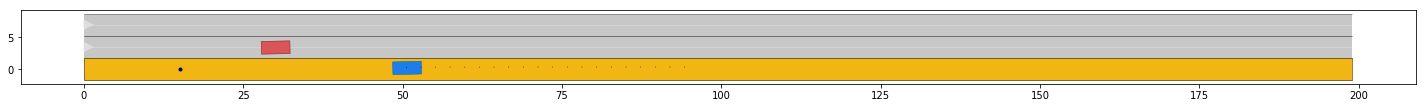

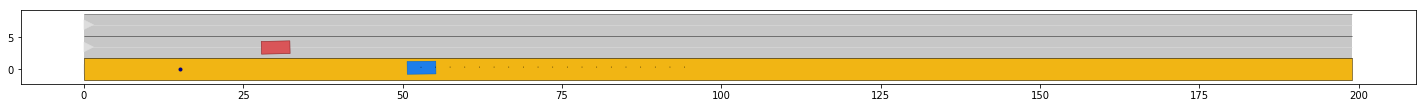

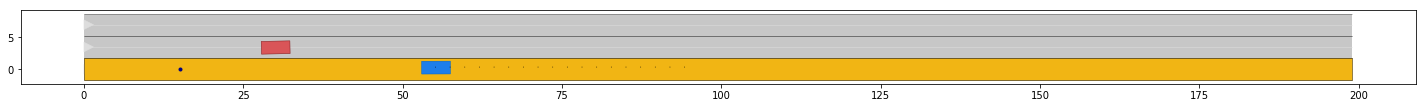

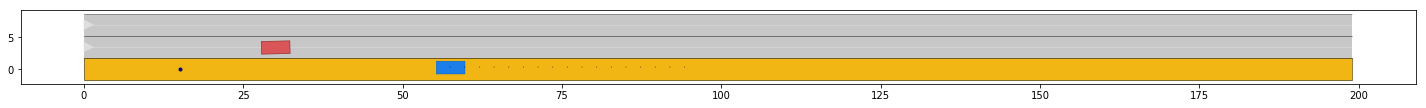

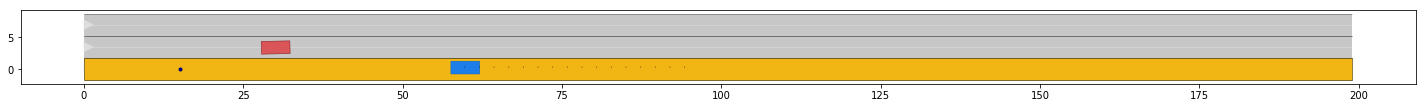

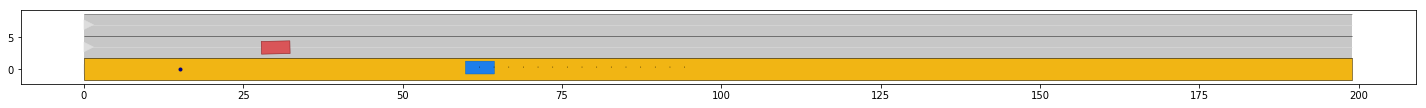

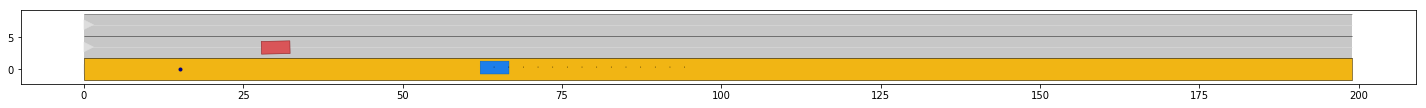

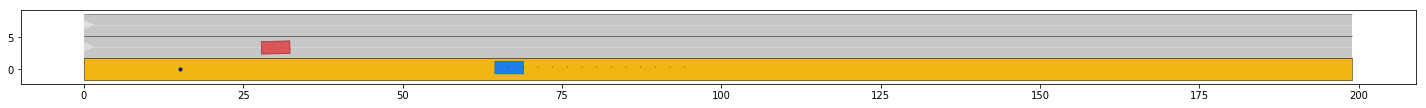

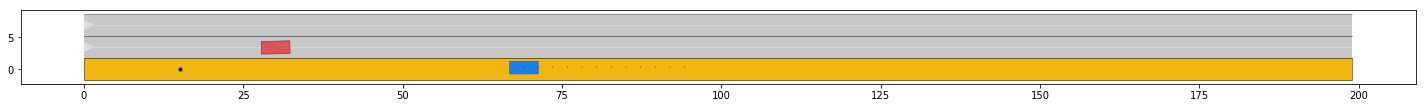

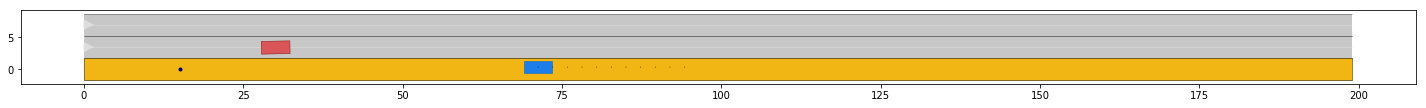

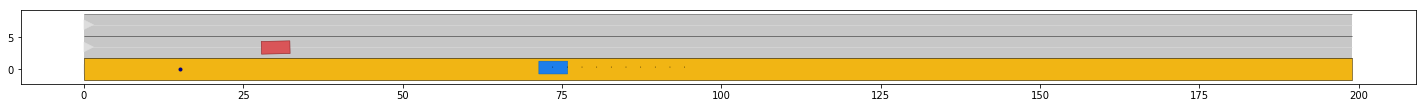

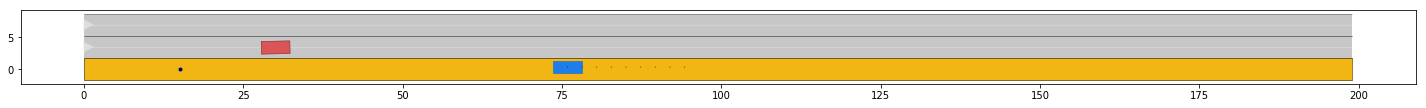

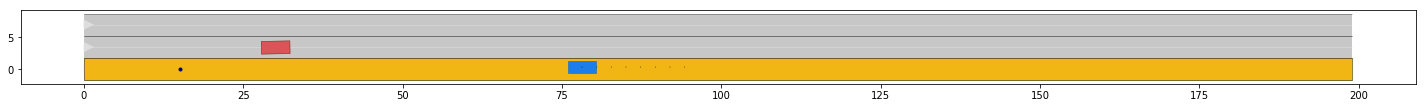

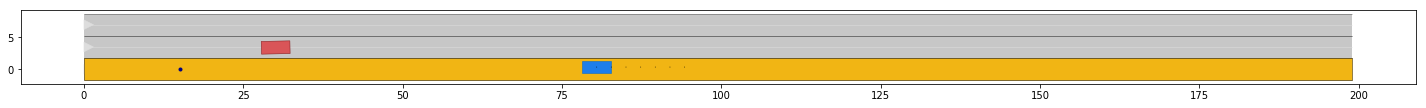

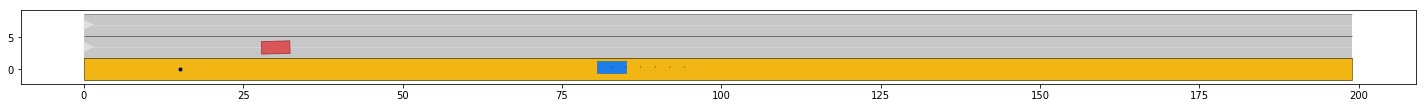

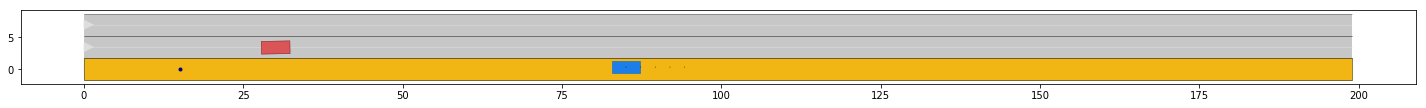

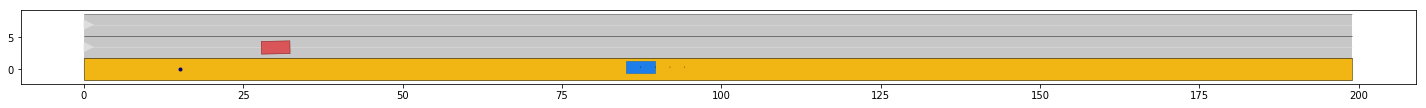

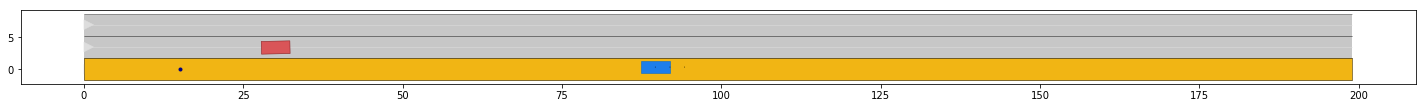

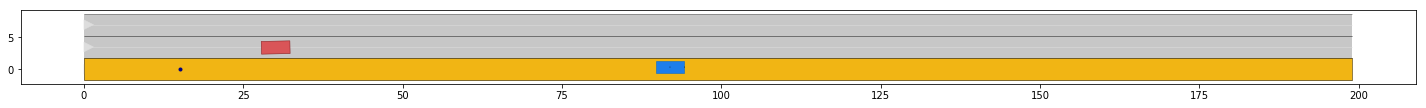

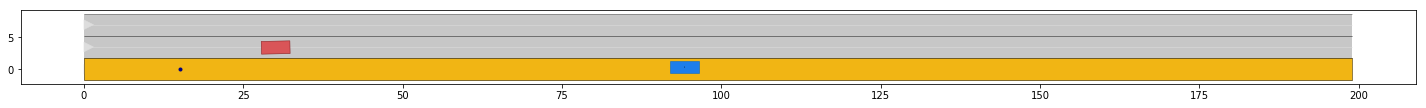

In [2]:
import numpy as np

from commonroad.geometry.shape import Rectangle
from commonroad.scenario.obstacle import StaticObstacle, ObstacleType
from commonroad.scenario.trajectory import State

# generate the static obstacle according to the specification
static_obstacle_id = scenario.generate_object_id()
static_obstacle_type = ObstacleType.PARKED_VEHICLE
static_obstacle_shape = Rectangle(width=2.0, length=4.5)
static_obstacle_initial_state = State(position=np.array([30, 3.5]),
                                      orientation=0.02, time_step=0)
static_obstacle = StaticObstacle(static_obstacle_id, 
                                 static_obstacle_type,
                                 static_obstacle_shape,
                                 static_obstacle_initial_state)

# add the static obstacle to the scenario
scenario.add_objects(static_obstacle)

# plot the scenario for each time step
for i in range(0, 41):
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()

We can further add a dynamic obstacle:

    - obstacle type: car
    - obstacle shape: rectangle with a width of 1.8m and a length of 4.3m
    - initial state:
        - position: (50, 0.0) m
        - orientation: 0.00 rad
        - velocity: 22 m/s
        
We assume that the dynamic obstacle drives with constant velocity.

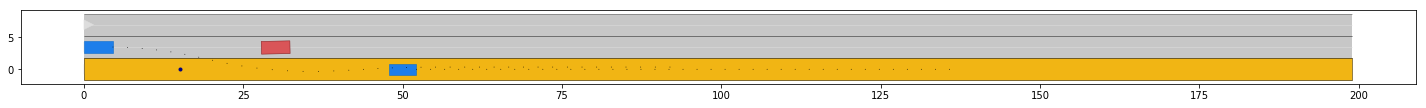

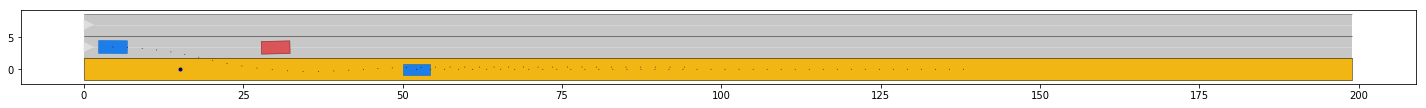

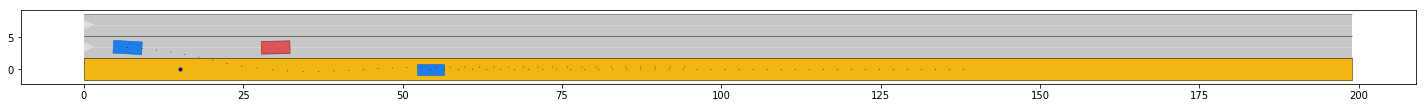

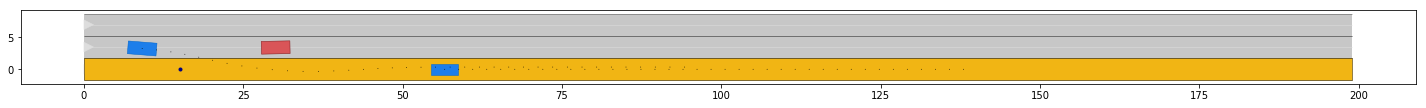

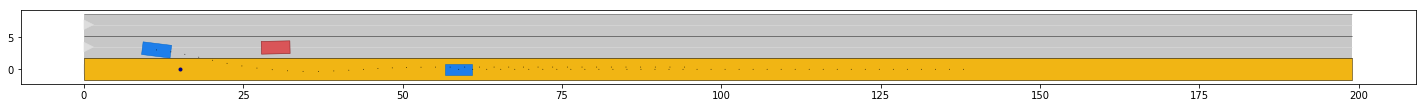

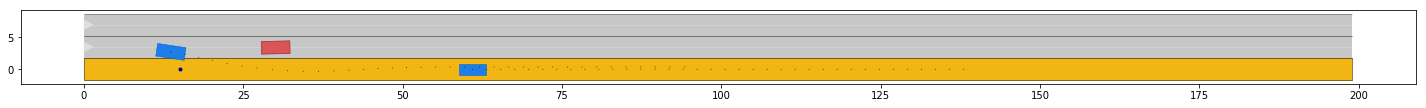

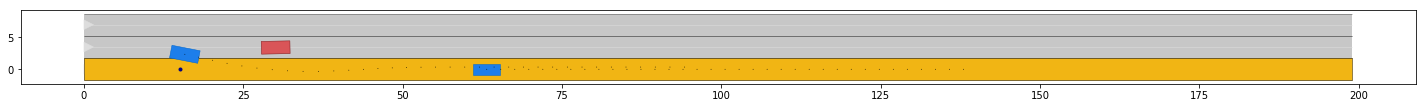

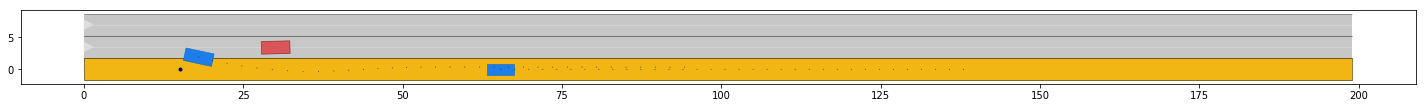

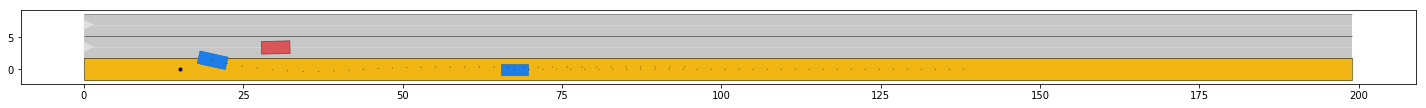

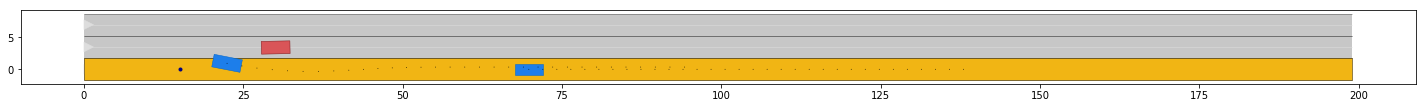

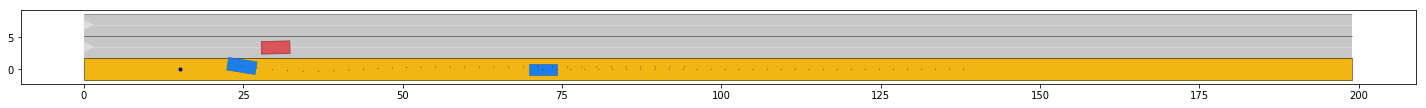

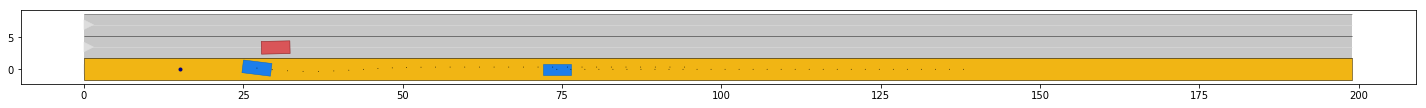

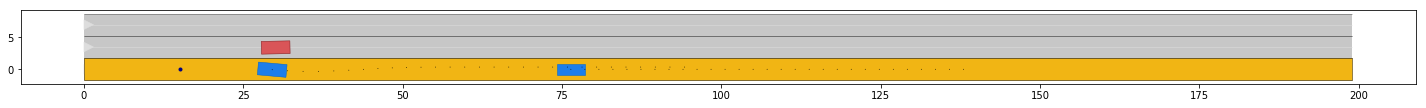

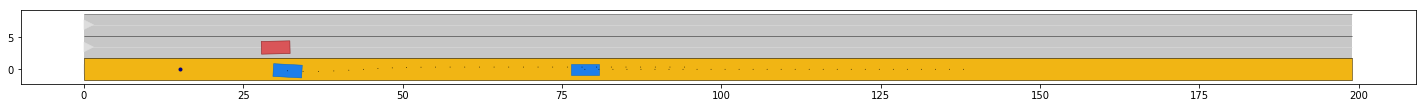

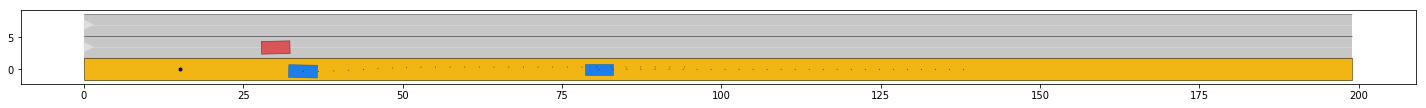

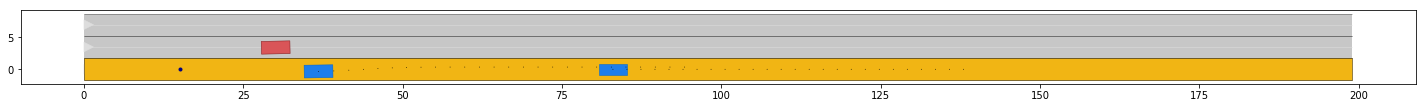

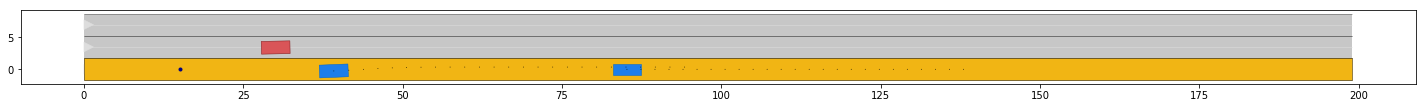

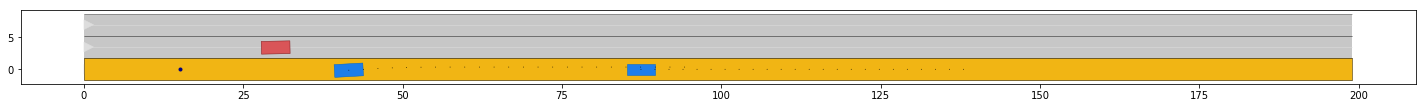

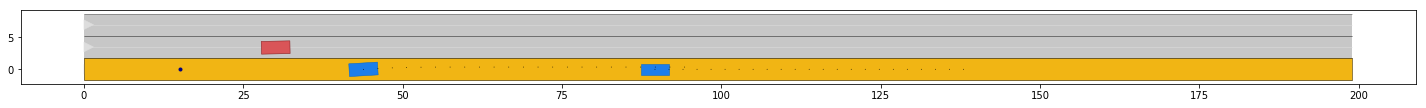

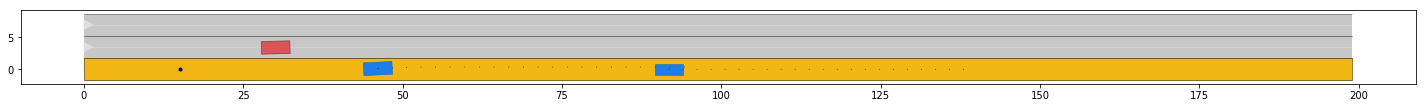

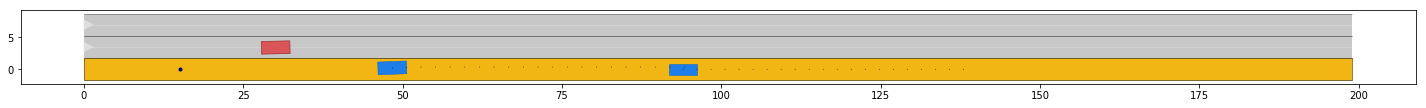

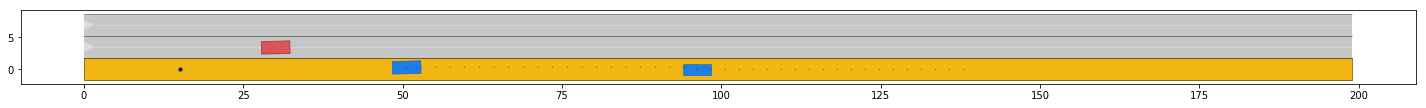

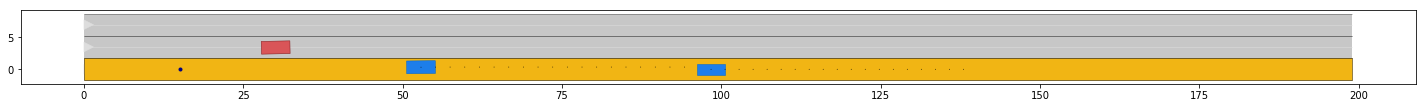

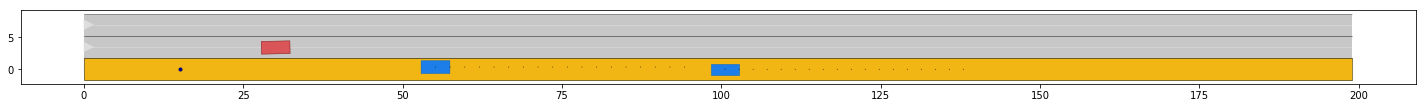

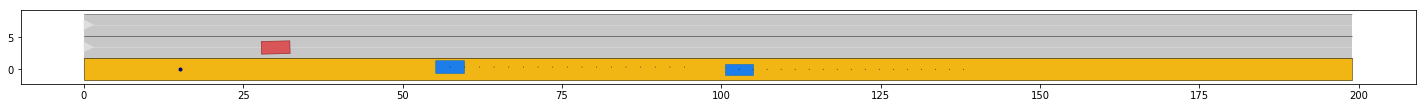

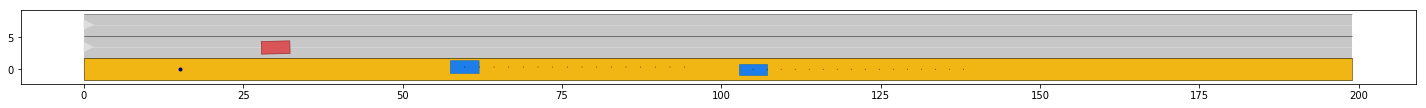

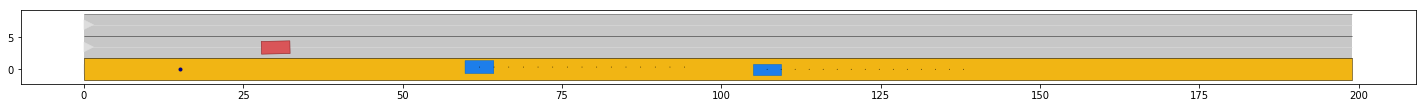

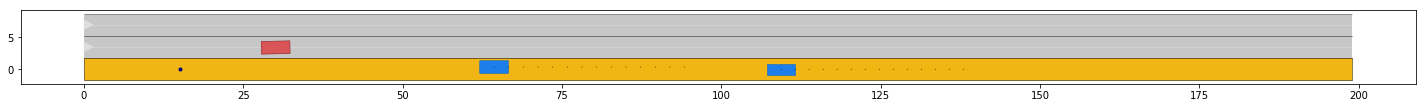

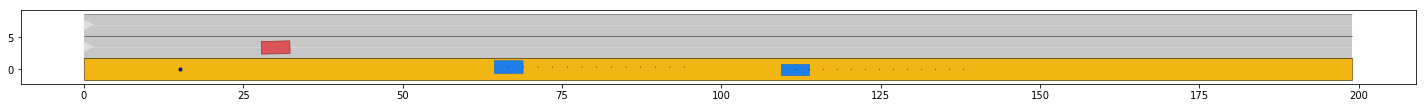

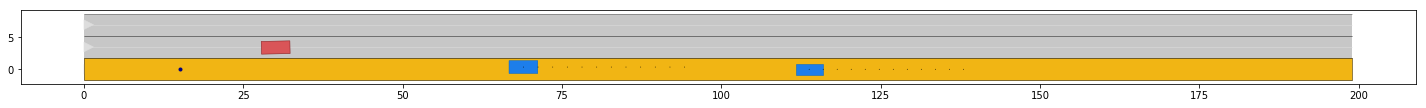

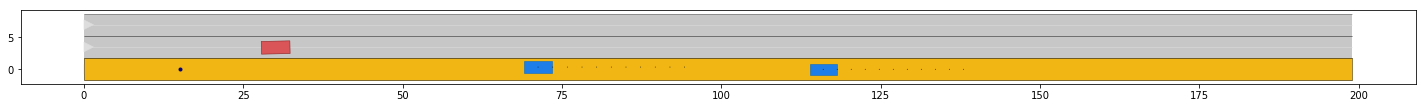

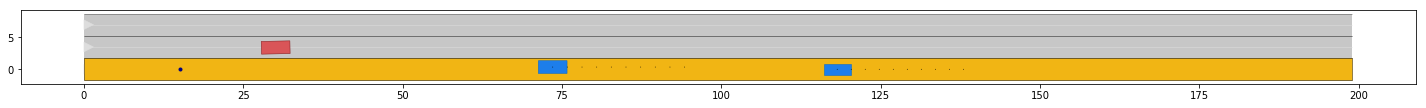

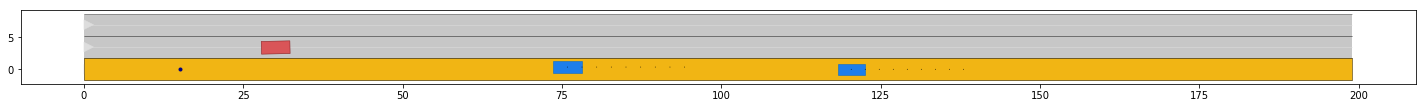

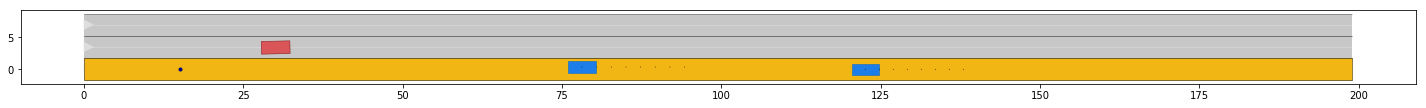

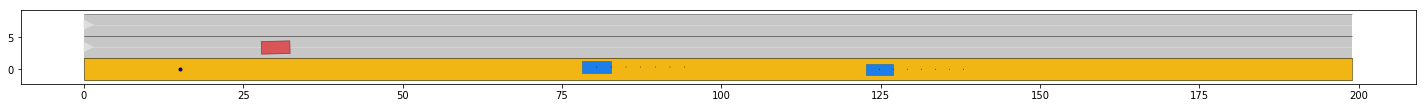

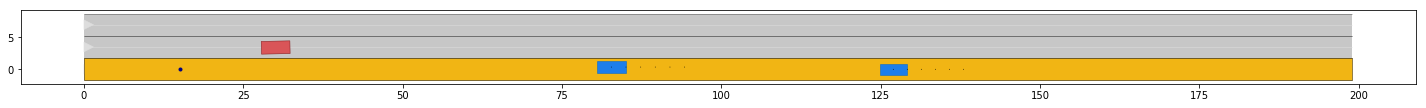

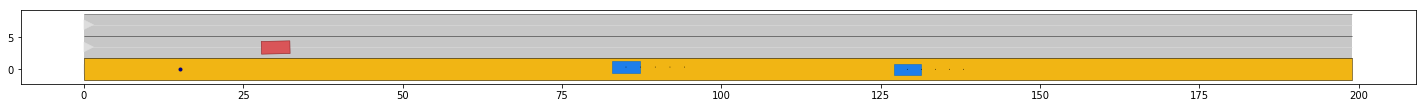

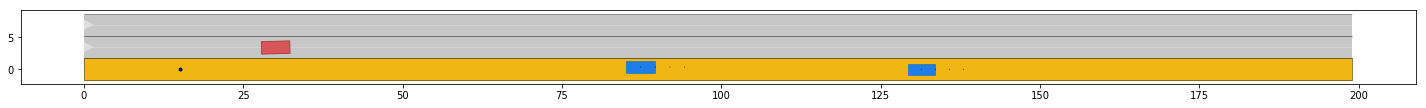

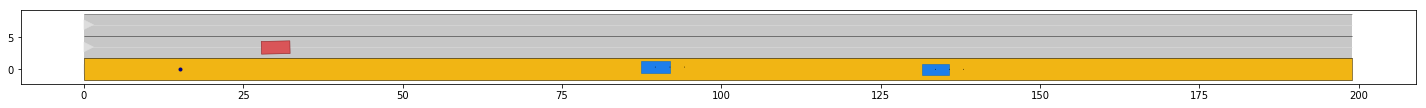

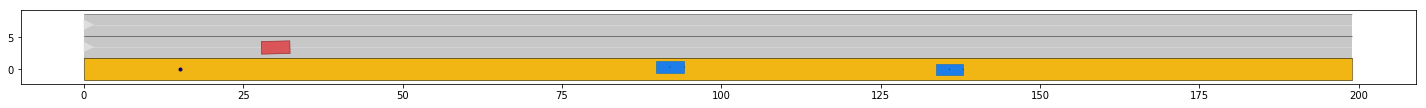

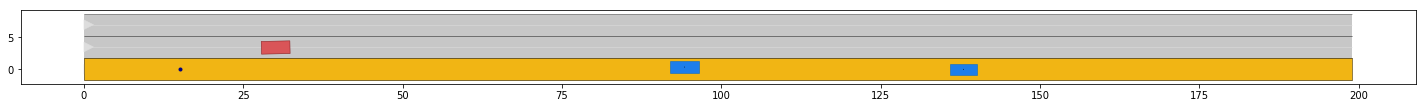

In [3]:
from commonroad.scenario.obstacle import DynamicObstacle
from commonroad.scenario.trajectory import Trajectory
from commonroad.prediction.prediction import TrajectoryPrediction

# generate the states of the obstacle for time steps 0 to 40 by assuming constant velocity
# initial state at time step 0
dynamic_obstacle_initial_state = State(position=np.array([50.0, 0.0]),
                                      orientation=0.0,
                                      velocity=22.0,
                                      time_step=0)

# compute states for time steps 1 to 40
state_list = [dynamic_obstacle_initial_state]
for i in range(1, 41):
    # compute new position
    new_position = np.array([dynamic_obstacle_initial_state.position[0] + 
            i*scenario.dt*dynamic_obstacle_initial_state.velocity, 0.0])
    # add new state to state_list
    state_list.append(State(position=new_position,
                            velocity=22.0,
                            time_step=i,
                            orientation=0.0))
# create the predicted trajectory starting at time step 1
dynamic_obstacle_trajectory = Trajectory(state_list=state_list[1:],
                                         initial_time_step=1)
# create the prediction using the predicted trajectory and the shape of the obstacle
dynamic_obstacle_shape = Rectangle(length=4.3, width=1.8)
dynamic_obstacle_prediction = TrajectoryPrediction(dynamic_obstacle_trajectory,
                                                   dynamic_obstacle_shape)

# generate the dynamic obstacle according to the specification
dynamic_obstacle_id = scenario.generate_object_id()
dynamic_obstacle_type = ObstacleType.CAR
dynamic_obstacle = DynamicObstacle(dynamic_obstacle_id,
                                   dynamic_obstacle_type,
                                   dynamic_obstacle_shape,
                                   dynamic_obstacle_initial_state,
                                   dynamic_obstacle_prediction)

# add static obstacle to the scenario
scenario.add_objects(dynamic_obstacle)

# plot the scenario for each time step
for i in range(0, 41):
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()

## Writing

The CommonRoadFileWriter writes a Scenario and a PlanningProblemSet to a CommonRoad XML-file:

In [4]:
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.file_writer import OverwriteExistingFile

author = 'Max Mustermann'
affiliation = 'Technical University of Munich, Germany'
source = ''
tags = 'highway multi_lane no_oncoming_traffic parallel_lanes comfort'
filename = 'ZAM_Tutorial-1_2_T-1.xml'

# write new scenario
scenario.benchmark_id = 'ZAM_Tutorial-1_2_T-1'
fw = CommonRoadFileWriter(scenario, planning_problem_set, author, 
                          affiliation, source, tags)

fw.write_to_file(filename, OverwriteExistingFile.ALWAYS)

Replace file ZAM_Tutorial-1_2_T-1.xml


We can open our stored file again to check if everything is correct:

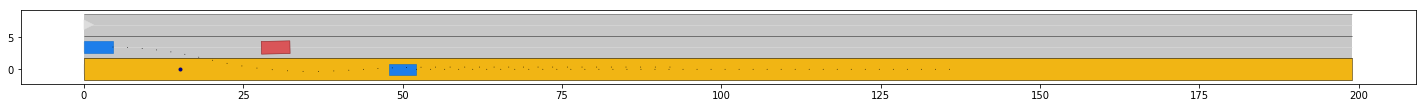

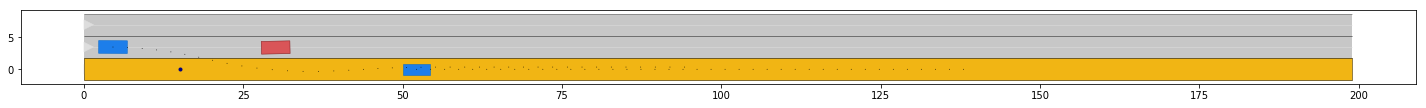

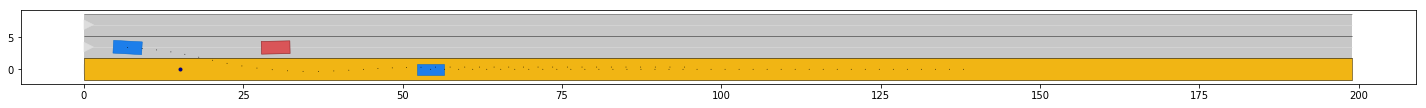

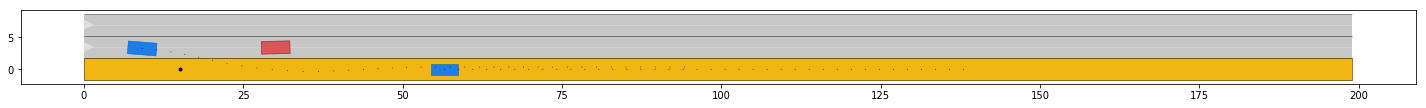

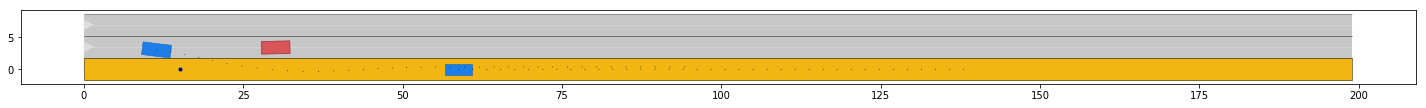

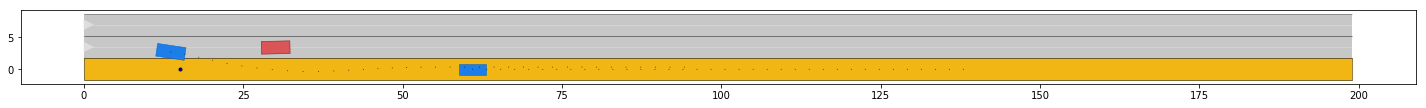

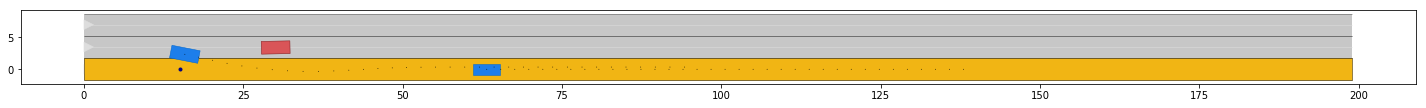

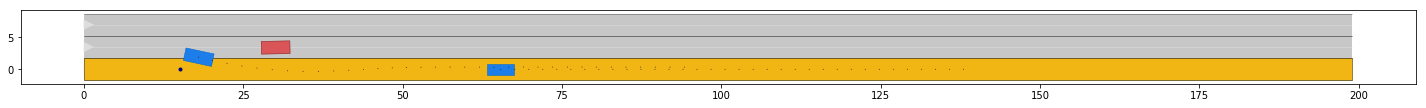

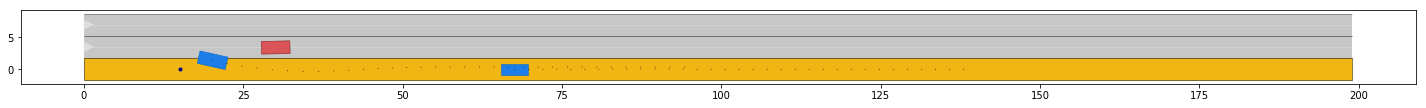

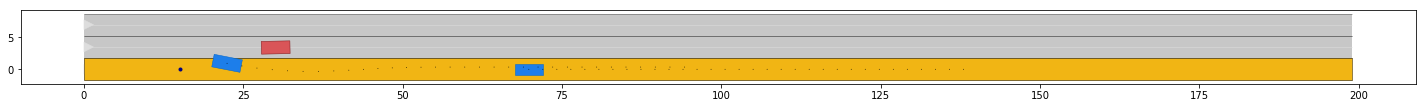

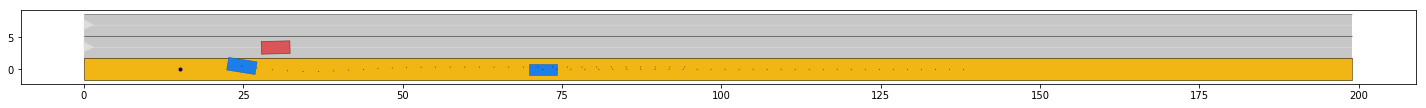

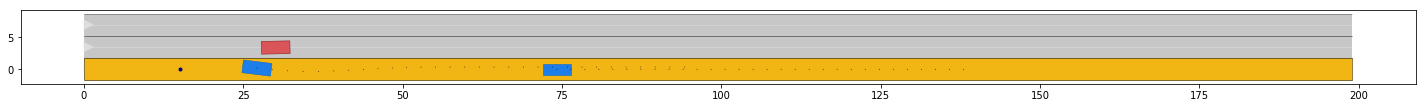

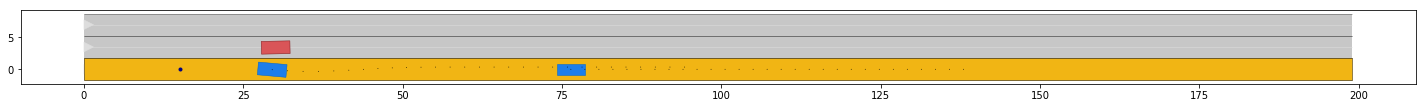

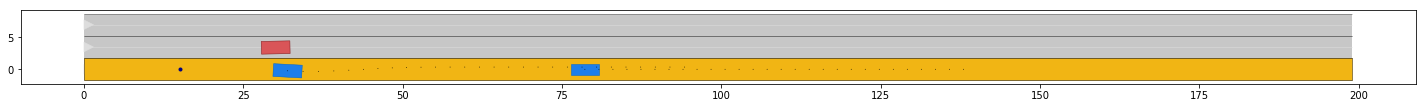

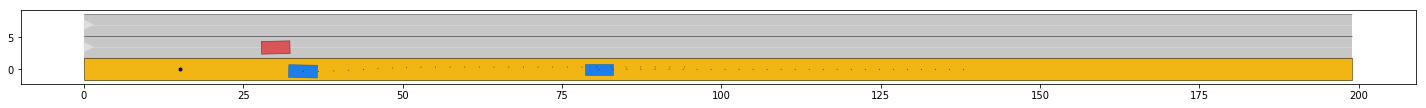

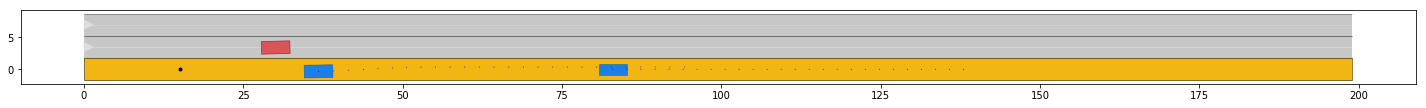

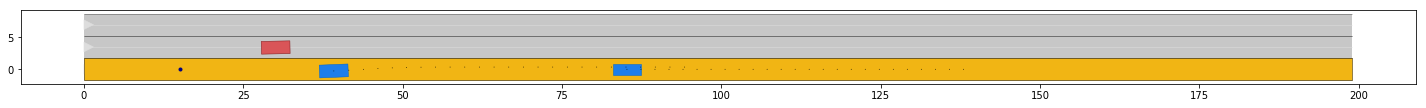

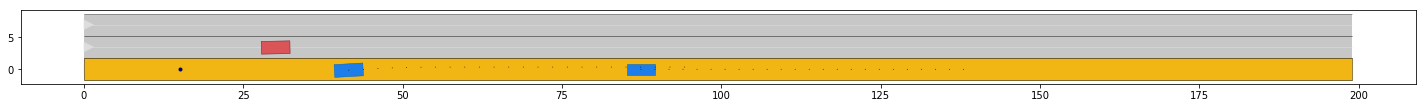

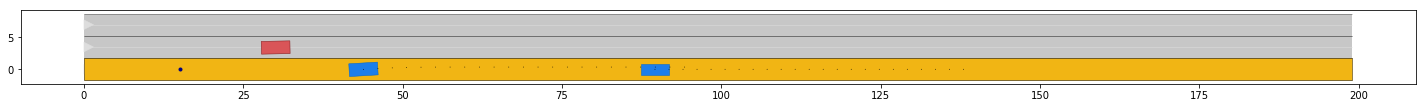

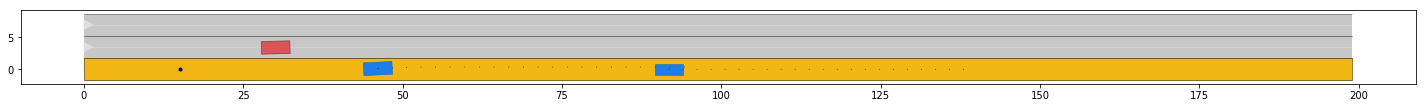

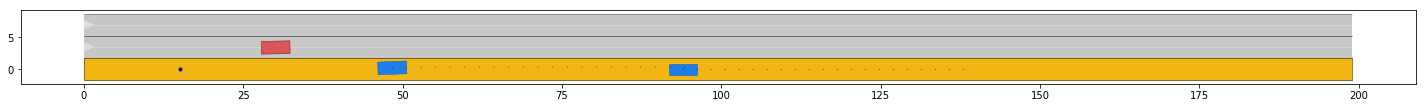

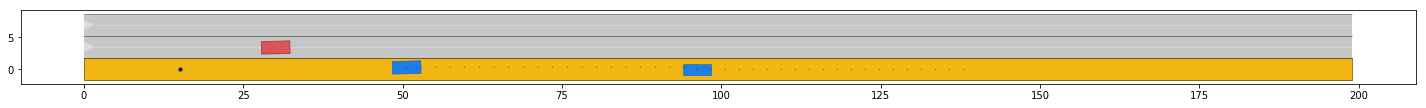

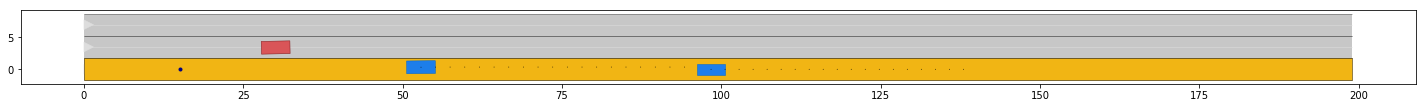

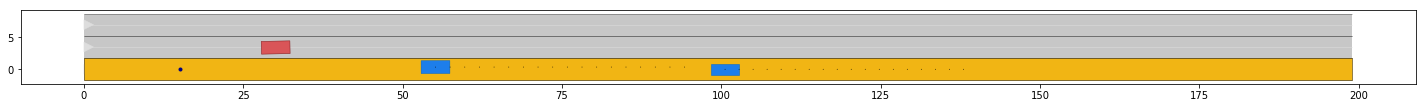

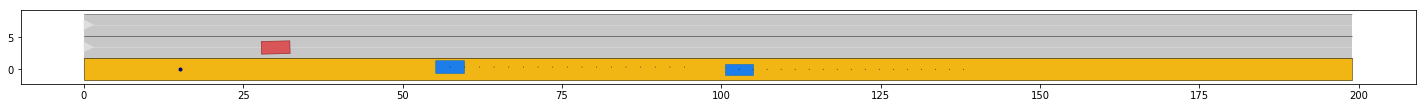

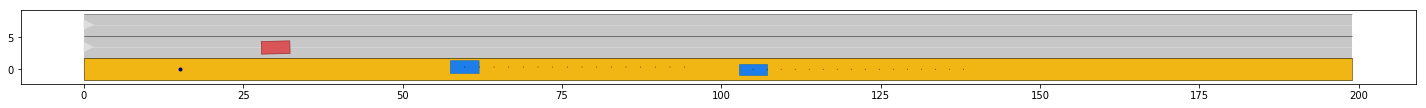

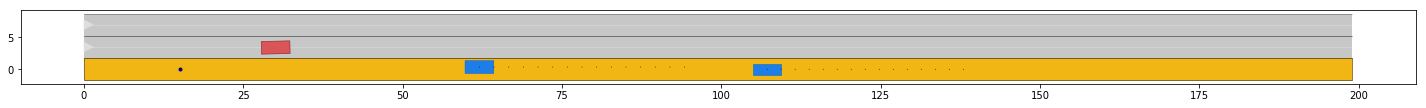

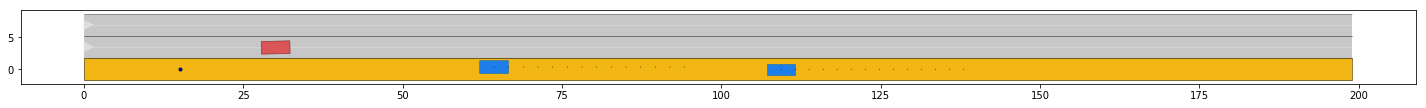

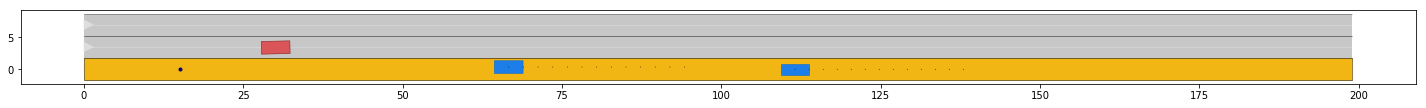

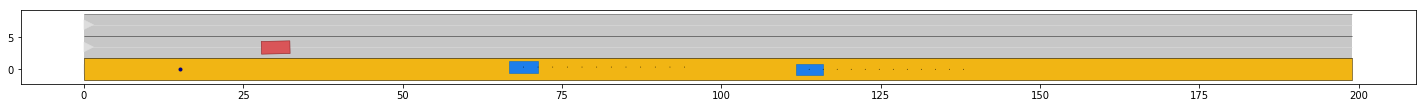

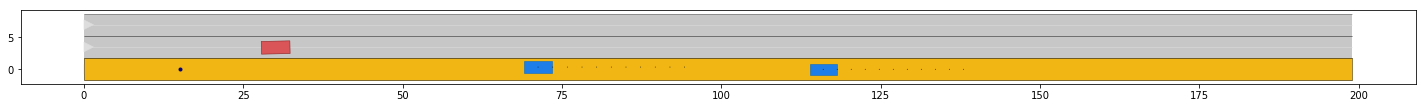

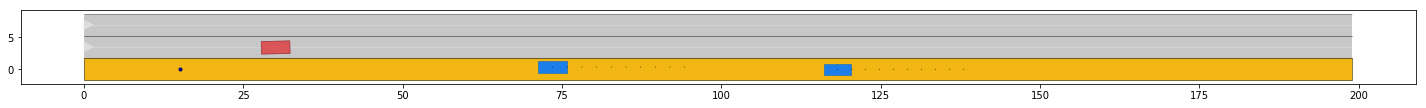

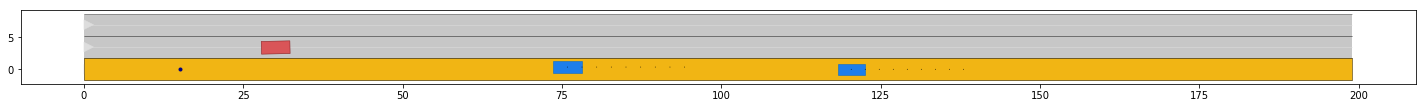

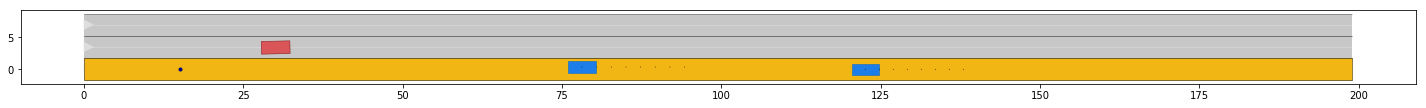

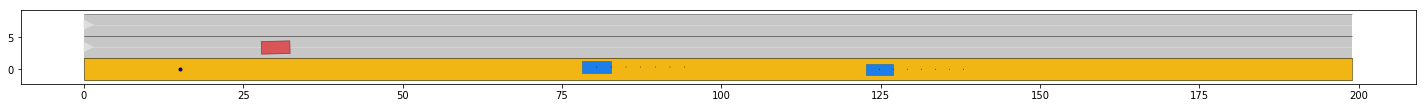

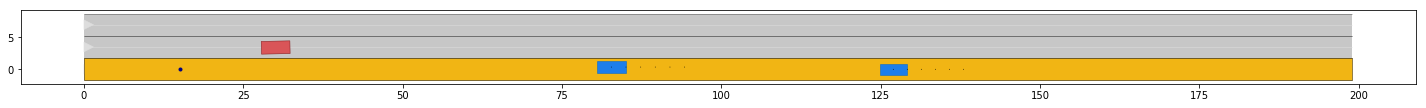

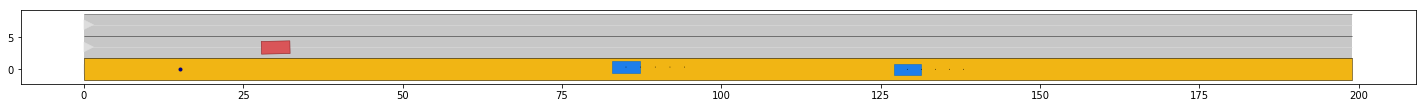

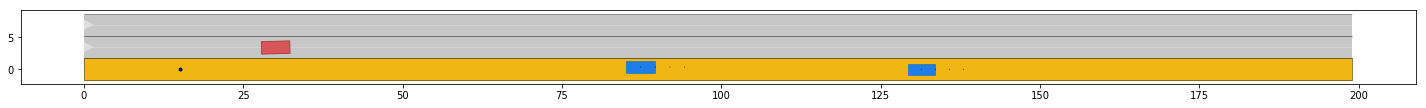

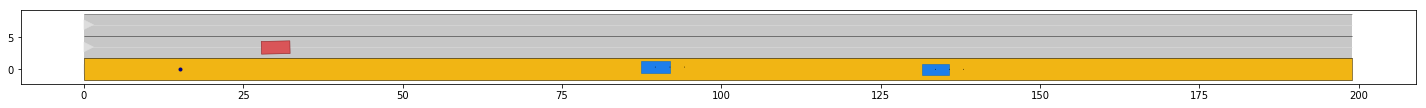

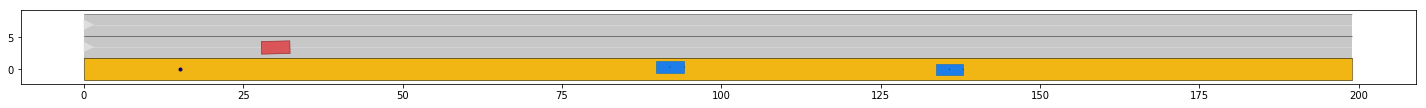

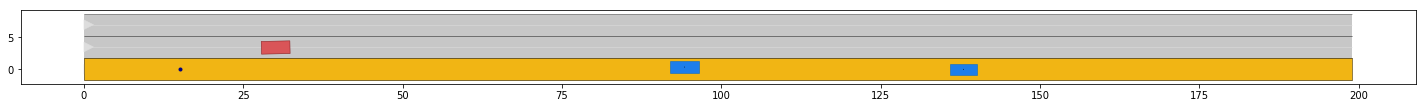

In [5]:
file_path = os.path.join(os.getcwd(), 'ZAM_Tutorial-1_2_T-1.xml')

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario for each time step
for i in range(0, 41):
    plt.figure(figsize=(25, 10))
    draw_object(scenario, draw_params={'time_begin': i})
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()